- **Regression** logistique : col num uniquement
score train, score test, pipeline(knnimputer, standard scaler, regression log) = dans gridsearch avec 10 crossvalidation et ressortir le score

- *Pipeline*(features num, knnimputer, scaler, et features cat à onehot (knn imputer random forest classifier,dummy regressor, reg log, KNN)) = calculer ACCURACY SCORE
et resultgrid

On peut frac = 0.25 , 0.30 ou 0.20


[mon super lien](http://cneuuziu.com)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px


In [3]:

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_selector


In [4]:

# Feature Selection
import shap

<div style="background-color:#9dedde; padding: 10px">
<h2>Chargement des données</h2>
</div>

In [5]:
df = pd.read_csv("app_train_sample_clean.csv")
df.head(5)

,AGE,ID_CLIENT,CIBLE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,...,TYPE_REVENUS_State servant,TYPE_REVENUS_Unemployed,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
0,48,196888,0,0,1350000.0,39604.5,2.0,1350000.0,135000.0,0.761443,...,0,0,1,0,1,0,0,0,0,1
1,54,101392,0,2,573628.5,24435.0,2.0,463500.0,81000.0,0.396825,...,0,0,1,0,1,0,0,0,1,1
2,25,435135,0,2,298512.0,19948.5,1.0,270000.0,112500.0,0.385353,...,0,0,1,0,1,0,0,0,0,0
3,30,396314,0,5,218016.0,17352.0,2.0,180000.0,81000.0,0.545649,...,0,0,1,1,1,0,0,0,0,1
4,44,341153,1,0,1006920.0,42790.5,2.0,900000.0,90000.0,0.444443,...,0,0,1,0,0,0,0,1,0,1


In [6]:
df.shape

(30751, 31)

In [7]:
df.tail()

,AGE,ID_CLIENT,CIBLE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,...,TYPE_REVENUS_State servant,TYPE_REVENUS_Unemployed,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
30746,41,311641,0,3,808650.0,23773.5,3.0,675000.0,90000.0,0.621768,...,1,0,0,0,0,0,0,1,0,2
30747,38,151728,1,20,85500.0,9108.0,1.0,85500.0,40500.0,0.393861,...,0,0,1,1,0,0,0,1,0,0
30748,44,384640,0,-1000,247500.0,12375.0,2.0,247500.0,69750.0,0.673987,...,0,0,0,0,1,0,0,0,1,1
30749,60,437079,0,-1000,270000.0,9828.0,1.0,270000.0,36000.0,0.546689,...,0,0,0,0,0,0,0,1,0,0
30750,59,389739,0,3,1288350.0,37053.0,1.0,1125000.0,148500.0,0.670388,...,0,0,1,0,0,0,0,1,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   AGE                                             30751 non-null  int64  
 1   ID_CLIENT                                       30751 non-null  int64  
 2   CIBLE                                           30751 non-null  int64  
 3   YEARS_EMPLOYED                                  30751 non-null  int64  
 4   TOTAL_CREDIT                                    30751 non-null  float64
 5   REMB_MENSUEL                                    30751 non-null  float64
 6   CNT_FAM_MEMBERS                                 30751 non-null  float64
 7   MONTANT_PRIX_BIENS                              30727 non-null  float64
 8   REVENU_TOTAL                                    30751 non-null  float64
 9   SOURCE_EXTERNE_2                       

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Analyse exploratoire</b>
    </h2>
</div>


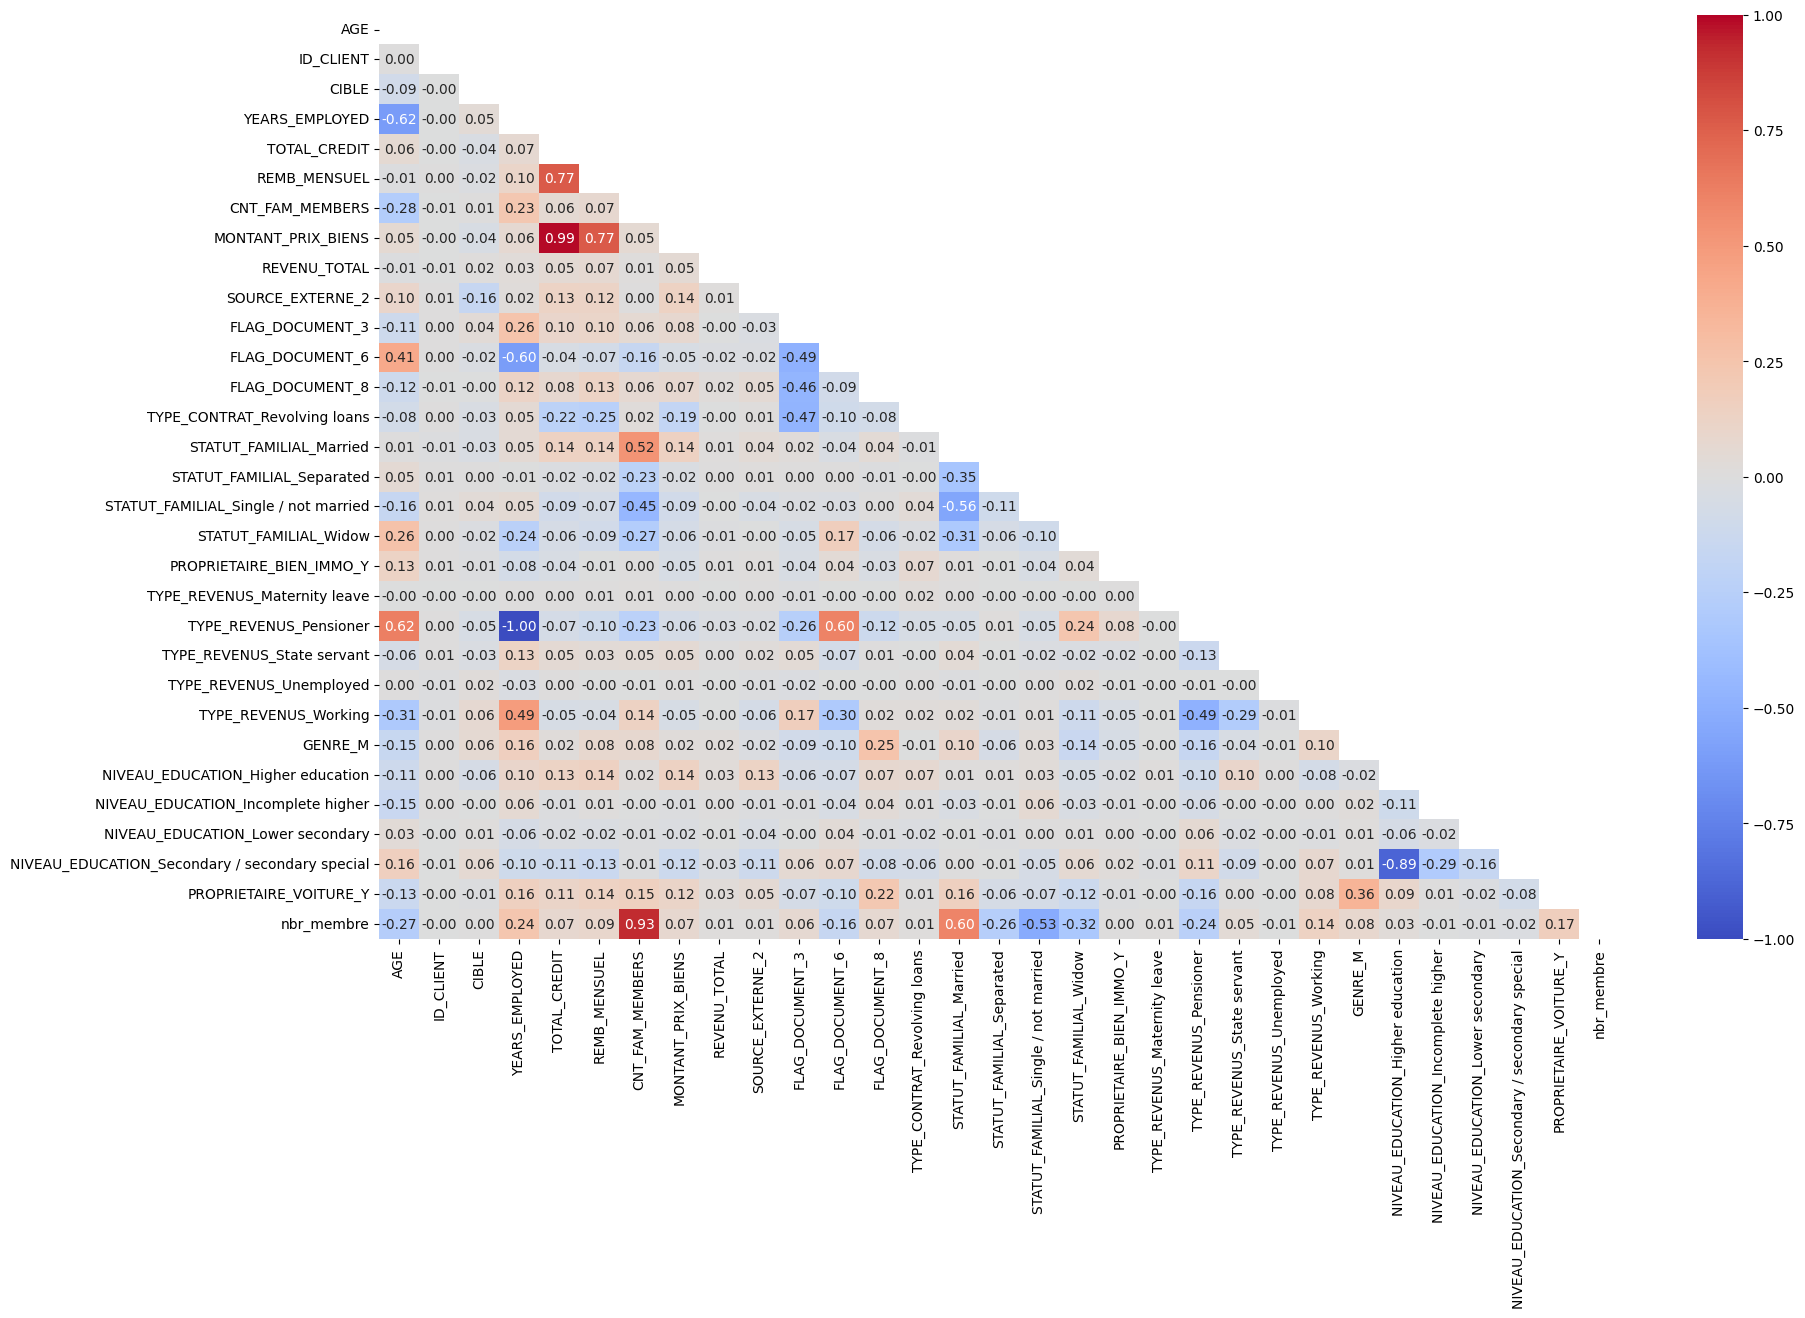

In [9]:
plt.figure(figsize=(20, 12))
corr = df.select_dtypes(include=("float64", "int64")).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", mask=mask, annot=True)
plt.show()

In [10]:
#df = df.sample(frac=0.10)


In [11]:
df

,AGE,ID_CLIENT,CIBLE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,...,TYPE_REVENUS_State servant,TYPE_REVENUS_Unemployed,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
0,48,196888,0,0,1350000.0,39604.5,2.0,1350000.0,135000.0,0.761443,...,0,0,1,0,1,0,0,0,0,1
1,54,101392,0,2,573628.5,24435.0,2.0,463500.0,81000.0,0.396825,...,0,0,1,0,1,0,0,0,1,1
2,25,435135,0,2,298512.0,19948.5,1.0,270000.0,112500.0,0.385353,...,0,0,1,0,1,0,0,0,0,0
3,30,396314,0,5,218016.0,17352.0,2.0,180000.0,81000.0,0.545649,...,0,0,1,1,1,0,0,0,0,1
4,44,341153,1,0,1006920.0,42790.5,2.0,900000.0,90000.0,0.444443,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,41,311641,0,3,808650.0,23773.5,3.0,675000.0,90000.0,0.621768,...,1,0,0,0,0,0,0,1,0,2
30747,38,151728,1,20,85500.0,9108.0,1.0,85500.0,40500.0,0.393861,...,0,0,1,1,0,0,0,1,0,0
30748,44,384640,0,-1000,247500.0,12375.0,2.0,247500.0,69750.0,0.673987,...,0,0,0,0,1,0,0,0,1,1
30749,60,437079,0,-1000,270000.0,9828.0,1.0,270000.0,36000.0,0.546689,...,0,0,0,0,0,0,0,1,0,0


In [12]:
19/3000

0.006333333333333333

In [13]:
# df_1 =df.loc[df.CIBLE==1]
# df_1

In [14]:
# n = df_1.shape[0]

In [15]:
# df_0 = df.loc[df.CIBLE==0]
# df_0 = df_0.sample(n)
# df_0

In [16]:
# df = pd.concat([df_0, df_1], axis=0, ignore_index = True)
# df

In [17]:
y = df["CIBLE"]

In [18]:
y.shape

(30751,)

In [19]:
# Dataframe des autres features, supression des targets
x_train = df.copy()

col_cible = ["ID_CLIENT", "CIBLE"]
x_train.drop(col_cible, axis=1, inplace=True)
x_train

,AGE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,...,TYPE_REVENUS_State servant,TYPE_REVENUS_Unemployed,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
0,48,0,1350000.0,39604.5,2.0,1350000.0,135000.0,0.761443,1,0,...,0,0,1,0,1,0,0,0,0,1
1,54,2,573628.5,24435.0,2.0,463500.0,81000.0,0.396825,1,0,...,0,0,1,0,1,0,0,0,1,1
2,25,2,298512.0,19948.5,1.0,270000.0,112500.0,0.385353,1,0,...,0,0,1,0,1,0,0,0,0,0
3,30,5,218016.0,17352.0,2.0,180000.0,81000.0,0.545649,1,0,...,0,0,1,1,1,0,0,0,0,1
4,44,0,1006920.0,42790.5,2.0,900000.0,90000.0,0.444443,1,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,41,3,808650.0,23773.5,3.0,675000.0,90000.0,0.621768,1,0,...,1,0,0,0,0,0,0,1,0,2
30747,38,20,85500.0,9108.0,1.0,85500.0,40500.0,0.393861,1,0,...,0,0,1,1,0,0,0,1,0,0
30748,44,-1000,247500.0,12375.0,2.0,247500.0,69750.0,0.673987,0,0,...,0,0,0,0,1,0,0,0,1,1
30749,60,-1000,270000.0,9828.0,1.0,270000.0,36000.0,0.546689,0,1,...,0,0,0,0,0,0,0,1,0,0


In [20]:
x_train.shape

(30751, 29)

In [21]:
x_train.dtypes

AGE                                                 int64
YEARS_EMPLOYED                                      int64
TOTAL_CREDIT                                      float64
REMB_MENSUEL                                      float64
CNT_FAM_MEMBERS                                   float64
MONTANT_PRIX_BIENS                                float64
REVENU_TOTAL                                      float64
SOURCE_EXTERNE_2                                  float64
FLAG_DOCUMENT_3                                     int64
FLAG_DOCUMENT_6                                     int64
FLAG_DOCUMENT_8                                     int64
TYPE_CONTRAT_Revolving loans                        int64
STATUT_FAMILIAL_Married                             int64
STATUT_FAMILIAL_Separated                           int64
STATUT_FAMILIAL_Single / not married                int64
STATUT_FAMILIAL_Widow                               int64
PROPRIETAIRE_BIEN_IMMO_Y                            int64
TYPE_REVENUS_M

In [22]:
# Dataframe des autres features, supression des targets
x_test = df.copy()

col_cible = ["ID_CLIENT", "CIBLE"]
x_test.drop(col_cible, axis=1, inplace=True)
x_test

,AGE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,...,TYPE_REVENUS_State servant,TYPE_REVENUS_Unemployed,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
0,48,0,1350000.0,39604.5,2.0,1350000.0,135000.0,0.761443,1,0,...,0,0,1,0,1,0,0,0,0,1
1,54,2,573628.5,24435.0,2.0,463500.0,81000.0,0.396825,1,0,...,0,0,1,0,1,0,0,0,1,1
2,25,2,298512.0,19948.5,1.0,270000.0,112500.0,0.385353,1,0,...,0,0,1,0,1,0,0,0,0,0
3,30,5,218016.0,17352.0,2.0,180000.0,81000.0,0.545649,1,0,...,0,0,1,1,1,0,0,0,0,1
4,44,0,1006920.0,42790.5,2.0,900000.0,90000.0,0.444443,1,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,41,3,808650.0,23773.5,3.0,675000.0,90000.0,0.621768,1,0,...,1,0,0,0,0,0,0,1,0,2
30747,38,20,85500.0,9108.0,1.0,85500.0,40500.0,0.393861,1,0,...,0,0,1,1,0,0,0,1,0,0
30748,44,-1000,247500.0,12375.0,2.0,247500.0,69750.0,0.673987,0,0,...,0,0,0,0,1,0,0,0,1,1
30749,60,-1000,270000.0,9828.0,1.0,270000.0,36000.0,0.546689,0,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:
x_test.shape, x_train.shape, y.shape 

((30751, 29), (30751, 29), (30751,))

In [24]:
# Séparation de l'ensemble X_train en 2 sous-ensembles

X_train, X_valid, y_train, y_valid = train_test_split(x_train, 
                                                       y, stratify=y, test_size=0.3, random_state=101)

X_train.shape, X_valid.shape

((21525, 29), (9226, 29))

In [25]:
# Standardisation des données

scaler = StandardScaler()
scaler.fit(X_train)

X_train_sd = scaler.transform(X_train)
X_valid_sd = scaler.transform(X_valid)

In [26]:
# Transformation des matrices standardisées en dataframe pour avoir les noms des variables

X_train_sd_df = pd.DataFrame(X_train_sd, columns=list(X_train))
X_valid_sd_df = pd.DataFrame(X_valid_sd, columns=list(X_train))
y_train_df = pd.DataFrame(y_train)
y_valid_df = pd.DataFrame(y_valid)

In [27]:
X_train_sd_df.shape, X_valid_sd_df.shape, y_train_df.shape, y_valid_df.shape

((21525, 29), (9226, 29), (21525, 1), (9226, 1))

In [28]:
y.info()


<class 'pandas.core.series.Series'>
RangeIndex: 30751 entries, 0 to 30750
Series name: CIBLE
Non-Null Count  Dtype
--------------  -----
30751 non-null  int64
dtypes: int64(1)
memory usage: 240.4 KB


In [29]:
print("y_train_series - TARGET")
print(pd.DataFrame({
    "COUNT": y_train.value_counts(),
    "RATIO": y_train.value_counts() / len(y_train) * 100}))

y_train_series - TARGET
       COUNT      RATIO
CIBLE                  
0      19795  91.962834
1       1730   8.037166


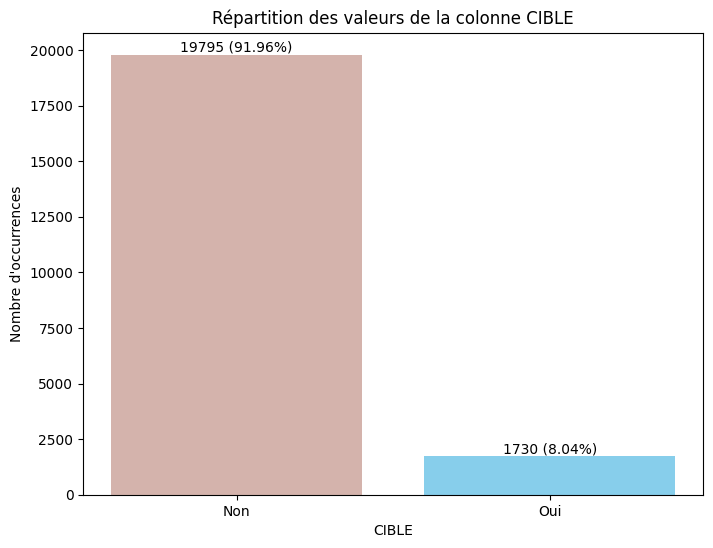

In [30]:
# Données à visualiser
counts = y_train.value_counts()
labels = counts.index
values = counts.values
total = sum(values)

# Calcul des pourcentages
percentages = [f'{(value / total * 100):.2f}%' for value in values]

# Création du graphique à barres
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['#d4b3ac', '#87CEEB'])  # Utilisation de couleurs personnalisées
plt.xlabel('CIBLE')
plt.ylabel("Nombre d'occurrences")
plt.title('Répartition des valeurs de la colonne CIBLE')

# Affichage des étiquettes au-dessus des barres
for bar, value, percentage in zip(bars, values, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             value, 
             f'{value} ({percentage})', 
             ha='center', 
             va='bottom', 
             color='black')

plt.xticks(labels, ['Non', 'Oui'])  # Renommer les étiquettes de l'axe des abscisses
plt.show()

RANDOMFOREST CLASSIFIER

In [31]:
rf = RandomForestClassifier(n_estimators=100, random_state=101, max_depth=2, n_jobs=4)

rf.fit(X_train_sd, y_train)

y_train_rf = rf.predict_proba(X_train_sd)
y_valid_rf = rf.predict_proba(X_valid_sd)

In [32]:
print(f"Accuracy Random Forest test : {accuracy_score(y_valid, rf.predict(X_valid_sd)):.2%}")

Accuracy Random Forest test : 91.97%


In [33]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=101, max_depth=2, n_jobs=4)

rf_model.fit(X_train_sd, y_train)

# prediction des probabilities et conservation uniquement des probabilités pour le résultat positif
y_train_rf = rf_model.predict_proba(X_train_sd)[:,1]
y_valid_rf = rf_model.predict_proba(X_valid_sd)[:,1]

In [34]:
rf_model

RandomForestClassifier(max_depth=2, n_jobs=4, random_state=101)

In [35]:
y_train_rf

array([0.08132858, 0.0567382 , 0.06924168, ..., 0.09584757, 0.08041646,
       0.07127971])

In [36]:
y_valid_rf

array([0.09563015, 0.05648488, 0.06448416, ..., 0.06382937, 0.10125699,
       0.08407701])

In [37]:
categ_col = x_train.select_dtypes(["object"]).columns
num_col = x_train.select_dtypes(["float64", "int64"]).columns

In [38]:
categ_col

Index([], dtype='object')

In [39]:
categ_col.shape

(0,)

In [40]:
num_col

Index(['AGE', 'YEARS_EMPLOYED', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'TYPE_CONTRAT_Revolving loans',
       'STATUT_FAMILIAL_Married', 'STATUT_FAMILIAL_Separated',
       'STATUT_FAMILIAL_Single / not married', 'STATUT_FAMILIAL_Widow',
       'PROPRIETAIRE_BIEN_IMMO_Y', 'TYPE_REVENUS_Maternity leave',
       'TYPE_REVENUS_Pensioner', 'TYPE_REVENUS_State servant',
       'TYPE_REVENUS_Unemployed', 'TYPE_REVENUS_Working', 'GENRE_M',
       'NIVEAU_EDUCATION_Higher education',
       'NIVEAU_EDUCATION_Incomplete higher',
       'NIVEAU_EDUCATION_Lower secondary',
       'NIVEAU_EDUCATION_Secondary / secondary special',
       'PROPRIETAIRE_VOITURE_Y', 'nbr_membre'],
      dtype='object')

In [41]:
num_col.shape

(29,)

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Modélisation</b>
    </h2>
</div>


In [42]:
# Créer les transformateurs
#numeric_transformer = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

#categorical_transformer = make_pipeline(
 #   SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")
#)


#preprocessor_1 = ColumnTransformer(
#    transformers=[
 #       ("num", numeric_transformer, num_col),
  #      ("cat", categorical_transformer, categ_col),
   # ],
    #remainder="drop",
#)



#pipeline = Pipeline(
 #   steps=[
  #      ("preprocessor", preprocessor_1),
   #     ("sampler", RandomUnderSampler()),
    #    ("estimator", RandomForestClassifier()),
    #]
#)

In [43]:
# Créer les transformateurs
numeric_transformer = make_pipeline(SimpleImputer(strategy="mean"))



preprocessor_1 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_col)],
    remainder="drop")



pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor_1),
        ("sampler", RandomUnderSampler()),
        ("estimator", RandomForestClassifier()),
    ]
)

In [44]:
def resultize(grid):
    res = pd.DataFrame(grid.cv_results_)  # Utilisez la méthode cv_results_()
    cols = [i for i in res.columns if "split" not in i]
    res = res.loc[:, cols]
    res.sort_values("mean_test_score", ascending=False, inplace=True)
    return res

In [45]:
param_grid = {

    "estimator": [RandomForestClassifier()],  # LogisticRegression(), DummyClassifier(),
    #'preprocessor__num__simpleimputer__strategy': ['mean', 'median'],
    #'preprocessor__cat__simpleimputer__strategy': ['most_frequent', 'constant', 'mean'],
    #'estimator__C': [0.1, 1.0, 10.0]
    "estimator__n_estimators" : [100, 200, 300, 500]
}

param_grid

{'estimator': [RandomForestClassifier()],
 'estimator__n_estimators': [100, 200, 300, 500]}

In [46]:
from sklearn.metrics import get_scorer_names # mettre en haut

In [47]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '

In [142]:
grid_1 = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    verbose=2,
    scoring="f1",
)
grid_1

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['AGE', 'YEARS_EMPLOYED', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'TYPE_CONTRA...
       'NIVEAU_EDUCATION_Lower secondary',
       'NIVEAU_EDUCATION_Secondary / secondary special',
       'PROPRIETAIRE_VOITURE_Y', 'nbr_membre'],
      dtype='object'))])),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier()],
                         'estimator__n_estimators': [100, 200, 300, 500]},
             return_train_score=True, scoring='f1', verbose=2)

In [143]:
print("Pipeline Steps:", pipeline.named_steps)

grid_1.fit(x_train, y)

Pipeline Steps: {'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['AGE', 'YEARS_EMPLOYED', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'TYPE_CONTRAT_Revolving loans',
       'STATUT_FAMILIAL_Married', 'STATUT_FAMILIAL...
       'PROPRIETAIRE_BIEN_IMMO_Y', 'TYPE_REVENUS_Maternity leave',
       'TYPE_REVENUS_Pensioner', 'TYPE_REVENUS_State servant',
       'TYPE_REVENUS_Unemployed', 'TYPE_REVENUS_Working', 'GENRE_M',
       'NIVEAU_EDUCATION_Higher education',
       'NIVEAU_EDUCATION_Incomplete higher',
       'NIVEAU_EDUCATION_Lower secondary',
       'NIVEAU_EDUCATION_Secondary / secondary special',
       'PROPRIETAIRE_VOITURE_Y', 'nbr_membre'],
      dtype='obj

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['AGE', 'YEARS_EMPLOYED', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'TYPE_CONTRA...
       'NIVEAU_EDUCATION_Lower secondary',
       'NIVEAU_EDUCATION_Secondary / secondary special',
       'PROPRIETAIRE_VOITURE_Y', 'nbr_membre'],
      dtype='object'))])),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier()],
                         'estimator__n_estimators': [100, 200, 300, 500]},
             return_train_score=True, scoring='f1', verbose=2)

In [149]:
from joblib import dump,load
dump(grid_1, "model_rf.joblib")
toto = load("model_rf.joblib")
toto

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['AGE', 'YEARS_EMPLOYED', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'TYPE_CONTRA...
       'NIVEAU_EDUCATION_Lower secondary',
       'NIVEAU_EDUCATION_Secondary / secondary special',
       'PROPRIETAIRE_VOITURE_Y', 'nbr_membre'],
      dtype='object'))])),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier()],
                         'estimator__n_estimators': [100, 200, 300, 500]},
             return_train_score=True, scoring='f1', verbose=2)

In [50]:
resultize(grid_1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_estimator__n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
3,12.485964,0.465839,1.004896,0.073416,RandomForestClassifier(),500,"{'estimator': RandomForestClassifier(), 'estim...",0.217283,0.007361,1,0.349295,0.002521
2,9.785287,1.995252,0.911274,0.093686,RandomForestClassifier(),300,"{'estimator': RandomForestClassifier(), 'estim...",0.217172,0.006412,2,0.348104,0.003985
1,6.587927,1.221886,0.654559,0.227406,RandomForestClassifier(),200,"{'estimator': RandomForestClassifier(), 'estim...",0.216901,0.007434,3,0.345842,0.005239
0,3.140705,0.356848,0.329666,0.026862,RandomForestClassifier(),100,"{'estimator': RandomForestClassifier(), 'estim...",0.216818,0.005624,4,0.350603,0.003925


In [51]:
y.value_counts(normalize=True)

CIBLE
0    0.919645
1    0.080355
Name: proportion, dtype: float64

In [52]:
best_model = grid_1.best_estimator_

best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['AGE', 'YEARS_EMPLOYED', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'TYPE_CONTRAT_Revolving loans',
       'STATUT_FA...
       'TYPE_REVENUS_Unemployed', 'TYPE_REVENUS_Working', 'GENRE_M',
       'NIVEAU_EDUCATION_Higher education',
       'NIVEAU_EDUCATION_Incomplete higher',
       'NIVEAU_EDUCATION_Lower secondary',
       'NIVEAU_EDUCATION_Secondary / secondary special',
       'PROPRIETAIRE_VOITURE_Y', 'nbr_membre'],
      dtype='object'))])),
                ('sampler', RandomUnderSampler()),
                ('estimator', RandomForestClassifier(n_estimators=500))])

In [53]:

# mettre en haut ==> double import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [54]:
# Séparez vos données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    x_train, y, test_size=0.2, random_state=42
)

## Init and Fit a Grid Search

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['AGE', 'YEARS_EMPLOYED', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'TYPE_CONTRA...
       'NIVEAU_EDUCATION_Lower secondary',
       'NIVEAU_EDUCATION_Secondary / secondary special',
       'PROPRIETAIRE_VOITURE_Y', 'nbr_membre'],
      dtype='object'))])),
                                       ('sampler', RandomUnderSampler()),
                                       ('estimator',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [RandomForestClassifier()],
                         'estimator__n_estimators': [100, 200, 300, 500]},
             return_train_score=True, scoring='f1', verbose=2)

In [56]:
df.columns.tolist()

['AGE',
 'ID_CLIENT',
 'CIBLE',
 'YEARS_EMPLOYED',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'CNT_FAM_MEMBERS',
 'MONTANT_PRIX_BIENS',
 'REVENU_TOTAL',
 'SOURCE_EXTERNE_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'TYPE_CONTRAT_Revolving loans',
 'STATUT_FAMILIAL_Married',
 'STATUT_FAMILIAL_Separated',
 'STATUT_FAMILIAL_Single / not married',
 'STATUT_FAMILIAL_Widow',
 'PROPRIETAIRE_BIEN_IMMO_Y',
 'TYPE_REVENUS_Maternity leave',
 'TYPE_REVENUS_Pensioner',
 'TYPE_REVENUS_State servant',
 'TYPE_REVENUS_Unemployed',
 'TYPE_REVENUS_Working',
 'GENRE_M',
 'NIVEAU_EDUCATION_Higher education',
 'NIVEAU_EDUCATION_Incomplete higher',
 'NIVEAU_EDUCATION_Lower secondary',
 'NIVEAU_EDUCATION_Secondary / secondary special',
 'PROPRIETAIRE_VOITURE_Y',
 'nbr_membre']

In [57]:
pipe = grid_1.best_estimator_
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['AGE', 'YEARS_EMPLOYED', 'TOTAL_CREDIT', 'REMB_MENSUEL',
       'CNT_FAM_MEMBERS', 'MONTANT_PRIX_BIENS', 'REVENU_TOTAL',
       'SOURCE_EXTERNE_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'TYPE_CONTRAT_Revolving loans',
       'STATUT_FA...
       'TYPE_REVENUS_Unemployed', 'TYPE_REVENUS_Working', 'GENRE_M',
       'NIVEAU_EDUCATION_Higher education',
       'NIVEAU_EDUCATION_Incomplete higher',
       'NIVEAU_EDUCATION_Lower secondary',
       'NIVEAU_EDUCATION_Secondary / secondary special',
       'PROPRIETAIRE_VOITURE_Y', 'nbr_membre'],
      dtype='object'))])),
                ('sampler', RandomUnderSampler()),
                ('estimator', RandomForestClassifier(n_estimators=200))])

In [58]:
X_train.shape

(24600, 29)

## Feature Importance

In [59]:
est = pipe.steps[-1]
est = est[1]
est

RandomForestClassifier(n_estimators=200)

In [60]:
preprocessor = pipe[:-1]

In [61]:
feature_names_out = preprocessor.get_feature_names_out()
feature_names_out

array(['num__AGE', 'num__YEARS_EMPLOYED', 'num__TOTAL_CREDIT',
       'num__REMB_MENSUEL', 'num__CNT_FAM_MEMBERS',
       'num__MONTANT_PRIX_BIENS', 'num__REVENU_TOTAL',
       'num__SOURCE_EXTERNE_2', 'num__FLAG_DOCUMENT_3',
       'num__FLAG_DOCUMENT_6', 'num__FLAG_DOCUMENT_8',
       'num__TYPE_CONTRAT_Revolving loans',
       'num__STATUT_FAMILIAL_Married', 'num__STATUT_FAMILIAL_Separated',
       'num__STATUT_FAMILIAL_Single / not married',
       'num__STATUT_FAMILIAL_Widow', 'num__PROPRIETAIRE_BIEN_IMMO_Y',
       'num__TYPE_REVENUS_Maternity leave', 'num__TYPE_REVENUS_Pensioner',
       'num__TYPE_REVENUS_State servant', 'num__TYPE_REVENUS_Unemployed',
       'num__TYPE_REVENUS_Working', 'num__GENRE_M',
       'num__NIVEAU_EDUCATION_Higher education',
       'num__NIVEAU_EDUCATION_Incomplete higher',
       'num__NIVEAU_EDUCATION_Lower secondary',
       'num__NIVEAU_EDUCATION_Secondary / secondary special',
       'num__PROPRIETAIRE_VOITURE_Y', 'num__nbr_membre'], dtype=object

In [62]:
feat_imp = est.feature_importances_
feat_imp 

array([1.07042918e-01, 8.09174399e-02, 1.07809803e-01, 1.13197892e-01,
       2.84502435e-02, 9.39848929e-02, 9.13379724e-02, 1.66708089e-01,
       1.54363084e-02, 4.61018181e-03, 7.28874777e-03, 7.59972682e-03,
       1.46548139e-02, 6.93811515e-03, 9.94779707e-03, 4.73899136e-03,
       1.96994829e-02, 0.00000000e+00, 5.05311265e-03, 7.12795987e-03,
       1.05544245e-04, 1.91693750e-02, 1.92650719e-02, 1.23129692e-02,
       4.14594074e-03, 2.14879347e-03, 1.23513477e-02, 1.85544201e-02,
       1.94020496e-02])

In [63]:
len(est.feature_importances_)

29

In [64]:
feature_imp_dict = {k: v for k, v in zip(feature_names_out, feat_imp)}
feature_imp_dict

{'num__AGE': 0.10704291784054475,
 'num__YEARS_EMPLOYED': 0.08091743994755314,
 'num__TOTAL_CREDIT': 0.10780980251016263,
 'num__REMB_MENSUEL': 0.11319789244301562,
 'num__CNT_FAM_MEMBERS': 0.028450243457367304,
 'num__MONTANT_PRIX_BIENS': 0.0939848928673306,
 'num__REVENU_TOTAL': 0.09133797242484615,
 'num__SOURCE_EXTERNE_2': 0.1667080888419172,
 'num__FLAG_DOCUMENT_3': 0.015436308417969127,
 'num__FLAG_DOCUMENT_6': 0.004610181814101548,
 'num__FLAG_DOCUMENT_8': 0.007288747766701906,
 'num__TYPE_CONTRAT_Revolving loans': 0.007599726816815849,
 'num__STATUT_FAMILIAL_Married': 0.014654813904196177,
 'num__STATUT_FAMILIAL_Separated': 0.006938115152897519,
 'num__STATUT_FAMILIAL_Single / not married': 0.009947797071555768,
 'num__STATUT_FAMILIAL_Widow': 0.004738991357953195,
 'num__PROPRIETAIRE_BIEN_IMMO_Y': 0.019699482906832818,
 'num__TYPE_REVENUS_Maternity leave': 0.0,
 'num__TYPE_REVENUS_Pensioner': 0.005053112648860891,
 'num__TYPE_REVENUS_State servant': 0.0071279598675116854,
 'num

In [65]:
# Recupere la feat importance, créé un pd.Serie et on filtre
feature_imp_ser = pd.Series(feature_imp_dict)
feature_imp_ser = feature_imp_ser.sort_values(ascending=False)
feature_imp_ser = feature_imp_ser[feature_imp_ser > 0.01]
feature_imp_ser = feature_imp_ser.round(4)

feature_imp_ser

num__SOURCE_EXTERNE_2                                  0.1667
num__REMB_MENSUEL                                      0.1132
num__TOTAL_CREDIT                                      0.1078
num__AGE                                               0.1070
num__MONTANT_PRIX_BIENS                                0.0940
num__REVENU_TOTAL                                      0.0913
num__YEARS_EMPLOYED                                    0.0809
num__CNT_FAM_MEMBERS                                   0.0285
num__PROPRIETAIRE_BIEN_IMMO_Y                          0.0197
num__nbr_membre                                        0.0194
num__GENRE_M                                           0.0193
num__TYPE_REVENUS_Working                              0.0192
num__PROPRIETAIRE_VOITURE_Y                            0.0186
num__FLAG_DOCUMENT_3                                   0.0154
num__STATUT_FAMILIAL_Married                           0.0147
num__NIVEAU_EDUCATION_Secondary / secondary special    0.0124
num__NIV

In [66]:
# save la feat importance

import pickle as pk  #  remonter la haut

with open("feat_importance.pk", "wb") as f : 
    pk.dump(feature_imp_ser, f)

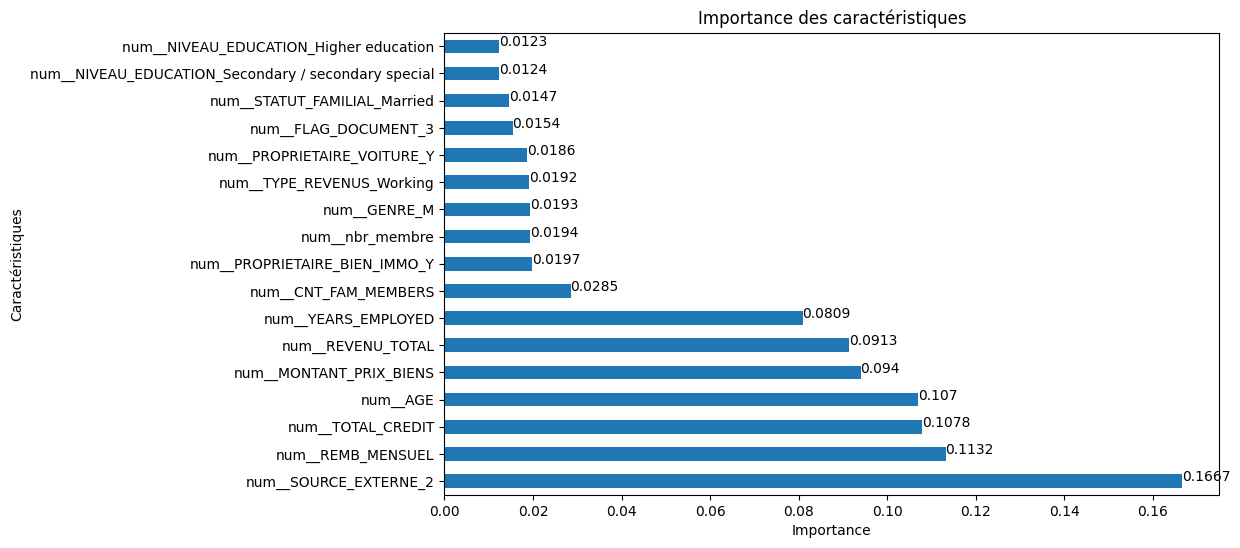

In [67]:

# Trier les données par ordre décroissant
feature_imp_ser = feature_imp_ser.sort_values(ascending=False)

# Tracer le graphique à barres avec les axes inversés
plt.figure(figsize=(10, 6))
feature_imp_ser.plot(kind='barh')  # Utilisation de 'barh' pour les barres horizontales
plt.title('Importance des caractéristiques')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')

# Ajouter les étiquettes des valeurs au-dessus des barres
for index, value in enumerate(feature_imp_ser):
    plt.text(value, index, str(value))

plt.show()

## Travaille sur Shap

In [68]:
def build_x_train_preprocessor(pipe, x_train):

    preprocessor = pipe.steps[0]
    preprocessor = preprocessor[1]
    preprocessor

    feat_name_out = preprocessor.get_feature_names_out()
    feat_name_out

    x_train_after_preprocess = preprocessor.transform(x_train)
    x_train_after_preprocess

    x_train_after_preprocess = pd.DataFrame(
        x_train_after_preprocess, columns=feat_name_out
    )

    return x_train_after_preprocess



def extract_est(pipe) : 

    return pipe.steps[-1][1]

In [69]:
x_train_after_preprocess = build_x_train_preprocessor(pipe, X_train)
x_train_after_preprocess

,num__AGE,num__YEARS_EMPLOYED,num__TOTAL_CREDIT,num__REMB_MENSUEL,num__CNT_FAM_MEMBERS,num__MONTANT_PRIX_BIENS,num__REVENU_TOTAL,num__SOURCE_EXTERNE_2,num__FLAG_DOCUMENT_3,num__FLAG_DOCUMENT_6,...,num__TYPE_REVENUS_State servant,num__TYPE_REVENUS_Unemployed,num__TYPE_REVENUS_Working,num__GENRE_M,num__NIVEAU_EDUCATION_Higher education,num__NIVEAU_EDUCATION_Incomplete higher,num__NIVEAU_EDUCATION_Lower secondary,num__NIVEAU_EDUCATION_Secondary / secondary special,num__PROPRIETAIRE_VOITURE_Y,num__nbr_membre
0,29.0,7.0,450000.0,29299.5,2.0,450000.0,58500.0,0.566445,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,47.0,5.0,238500.0,28435.5,2.0,238500.0,225000.0,0.531112,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,61.0,-1000.0,284400.0,10849.5,2.0,225000.0,49500.0,0.454729,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,56.0,8.0,808650.0,26217.0,2.0,675000.0,90000.0,0.665124,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,52.0,-1000.0,112500.0,7515.0,2.0,112500.0,31500.0,0.466001,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,29.0,5.0,808650.0,31333.5,3.0,675000.0,112500.0,0.303793,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
24596,28.0,4.0,508495.5,24462.0,3.0,454500.0,171000.0,0.683476,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
24597,65.0,-1000.0,454500.0,18022.5,1.0,454500.0,67500.0,0.209862,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24598,35.0,4.0,247500.0,12375.0,3.0,247500.0,112500.0,0.650312,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [70]:
x_train_after_preprocess.shape

(24600, 29)

In [71]:
x_train_after_preprocess_sample=x_train_after_preprocess.sample(frac=0.1)

In [72]:
explainer = shap.TreeExplainer(est, x_train_after_preprocess_sample)
explainer

In [73]:
#explainer.__dict__.keys()


In [74]:
with open("shap_explainer.pk", "wb") as f:
    pk.dump(explainer, f)

In [75]:
[i for i in explainer.__dir__() if "__" not in i]

['data_feature_names',
 'model',
 'output_names',
 'feature_names',
 'masker',
 'link',
 'linearize_link',
 'data',
 'data_missing',
 'feature_perturbation',
 'expected_value',
 'model_output',
 'approximate',
 '_validate_inputs',
 'shap_values',
 '_get_shap_output',
 'shap_interaction_values',
 '_get_shap_interactions_output',
 'assert_additivity',
 'supports_model_with_masker',
 'explain_row',
 '_compute_main_effects',
 'save',
 'load',
 '_instantiated_load']

In [76]:
def shapeit(i, explainer, x_train_after_preprocess):
    """take x_train_after_preprocess and i and give back shap values"""

    val_ = explainer.shap_values(x_train_after_preprocess.iloc[i])
    val_ = pd.DataFrame(
        val_, index=x_train_after_preprocess.columns, columns=["TRUE", "FALSE"]
    )
    val_ = val_.iloc[:, 0].sort_values(ascending=False).head(15)

    return val_.round(4).to_dict()

In [77]:
explainer.__dict__.keys()

dict_keys(['data_feature_names', 'model', 'output_names', 'feature_names', 'masker', 'link', 'linearize_link', 'data', 'data_missing', 'feature_perturbation', 'expected_value', 'model_output', 'approximate'])

In [78]:
x_train_after_preprocess_sample.iloc[:100]

,num__AGE,num__YEARS_EMPLOYED,num__TOTAL_CREDIT,num__REMB_MENSUEL,num__CNT_FAM_MEMBERS,num__MONTANT_PRIX_BIENS,num__REVENU_TOTAL,num__SOURCE_EXTERNE_2,num__FLAG_DOCUMENT_3,num__FLAG_DOCUMENT_6,...,num__TYPE_REVENUS_State servant,num__TYPE_REVENUS_Unemployed,num__TYPE_REVENUS_Working,num__GENRE_M,num__NIVEAU_EDUCATION_Higher education,num__NIVEAU_EDUCATION_Incomplete higher,num__NIVEAU_EDUCATION_Lower secondary,num__NIVEAU_EDUCATION_Secondary / secondary special,num__PROPRIETAIRE_VOITURE_Y,num__nbr_membre
7254,26.0,1.0,279000.0,8829.0,1.0,279000.0,121500.0,0.583357,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14382,30.0,7.0,180000.0,12028.5,3.0,180000.0,180000.0,0.508376,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
3116,57.0,-1000.0,454500.0,21865.5,2.0,454500.0,112500.0,0.724170,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
15254,33.0,7.0,247500.0,7222.5,2.0,247500.0,99000.0,0.412591,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2763,31.0,9.0,193500.0,10624.5,2.0,193500.0,112500.0,0.657464,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,32.0,2.0,728460.0,68238.0,2.0,675000.0,315000.0,0.748492,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
17348,59.0,4.0,291384.0,20853.0,2.0,270000.0,112500.0,0.552871,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
861,39.0,9.0,270000.0,26703.0,2.0,270000.0,157500.0,0.611606,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23838,58.0,-1000.0,523597.5,20614.5,2.0,468000.0,67500.0,0.445226,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [79]:
shap_values = explainer.shap_values(x_train_after_preprocess_sample)
shap_values

100%|===================| 4909/4920 [07:24<00:00]        

array([[[-0.05889543,  0.05889543],
        [-0.06407944,  0.06407944],
        [-0.01221864,  0.01221864],
        ...,
        [-0.01796003,  0.01796003],
        [-0.01203452,  0.01203452],
        [-0.01220172,  0.01220172]],

       [[-0.03988805,  0.03988805],
        [ 0.01185326, -0.01185326],
        [ 0.02247322, -0.02247322],
        ...,
        [-0.00449248,  0.00449248],
        [ 0.00777152, -0.00777152],
        [ 0.00275293, -0.00275293]],

       [[ 0.06366959, -0.06366959],
        [ 0.00023622, -0.00023622],
        [ 0.00985897, -0.00985897],
        ...,
        [-0.00371095,  0.00371095],
        [ 0.00832315, -0.00832315],
        [ 0.01172242, -0.01172242]],

       ...,

       [[ 0.03561231, -0.03561231],
        [-0.01439714,  0.01439714],
        [ 0.0271048 , -0.0271048 ],
        ...,
        [ 0.01436092, -0.01436092],
        [ 0.00307411, -0.00307411],
        [-0.00302572,  0.00302572]],

       [[ 0.02507461, -0.02507461],
        [ 0.0342504 , -0.03

In [80]:
# Récupération des noms des colonnes
feature_names = x_train_after_preprocess_sample.columns
feature_names

Index(['num__AGE', 'num__YEARS_EMPLOYED', 'num__TOTAL_CREDIT',
       'num__REMB_MENSUEL', 'num__CNT_FAM_MEMBERS', 'num__MONTANT_PRIX_BIENS',
       'num__REVENU_TOTAL', 'num__SOURCE_EXTERNE_2', 'num__FLAG_DOCUMENT_3',
       'num__FLAG_DOCUMENT_6', 'num__FLAG_DOCUMENT_8',
       'num__TYPE_CONTRAT_Revolving loans', 'num__STATUT_FAMILIAL_Married',
       'num__STATUT_FAMILIAL_Separated',
       'num__STATUT_FAMILIAL_Single / not married',
       'num__STATUT_FAMILIAL_Widow', 'num__PROPRIETAIRE_BIEN_IMMO_Y',
       'num__TYPE_REVENUS_Maternity leave', 'num__TYPE_REVENUS_Pensioner',
       'num__TYPE_REVENUS_State servant', 'num__TYPE_REVENUS_Unemployed',
       'num__TYPE_REVENUS_Working', 'num__GENRE_M',
       'num__NIVEAU_EDUCATION_Higher education',
       'num__NIVEAU_EDUCATION_Incomplete higher',
       'num__NIVEAU_EDUCATION_Lower secondary',
       'num__NIVEAU_EDUCATION_Secondary / secondary special',
       'num__PROPRIETAIRE_VOITURE_Y', 'num__nbr_membre'],
      dtype='object

In [81]:
import pickle as pk

with open("shap.pk", "wb") as f : 
    pk.dump(shap_values, f)

## Test shap values for one id

In [82]:
x_train_after_preprocess.iloc[10, :]

num__AGE                                                   45.000000
num__YEARS_EMPLOYED                                         3.000000
num__TOTAL_CREDIT                                      675000.000000
num__REMB_MENSUEL                                       53329.500000
num__CNT_FAM_MEMBERS                                        2.000000
num__MONTANT_PRIX_BIENS                                675000.000000
num__REVENU_TOTAL                                      180000.000000
num__SOURCE_EXTERNE_2                                       0.673703
num__FLAG_DOCUMENT_3                                        0.000000
num__FLAG_DOCUMENT_6                                        0.000000
num__FLAG_DOCUMENT_8                                        0.000000
num__TYPE_CONTRAT_Revolving loans                           0.000000
num__STATUT_FAMILIAL_Married                                1.000000
num__STATUT_FAMILIAL_Separated                              0.000000
num__STATUT_FAMILIAL_Single / not 

In [83]:
x_train_after_preprocess.isna().sum().sum()

0

In [84]:
x_train_after_preprocess

,num__AGE,num__YEARS_EMPLOYED,num__TOTAL_CREDIT,num__REMB_MENSUEL,num__CNT_FAM_MEMBERS,num__MONTANT_PRIX_BIENS,num__REVENU_TOTAL,num__SOURCE_EXTERNE_2,num__FLAG_DOCUMENT_3,num__FLAG_DOCUMENT_6,...,num__TYPE_REVENUS_State servant,num__TYPE_REVENUS_Unemployed,num__TYPE_REVENUS_Working,num__GENRE_M,num__NIVEAU_EDUCATION_Higher education,num__NIVEAU_EDUCATION_Incomplete higher,num__NIVEAU_EDUCATION_Lower secondary,num__NIVEAU_EDUCATION_Secondary / secondary special,num__PROPRIETAIRE_VOITURE_Y,num__nbr_membre
0,29.0,7.0,450000.0,29299.5,2.0,450000.0,58500.0,0.566445,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,47.0,5.0,238500.0,28435.5,2.0,238500.0,225000.0,0.531112,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,61.0,-1000.0,284400.0,10849.5,2.0,225000.0,49500.0,0.454729,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,56.0,8.0,808650.0,26217.0,2.0,675000.0,90000.0,0.665124,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,52.0,-1000.0,112500.0,7515.0,2.0,112500.0,31500.0,0.466001,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,29.0,5.0,808650.0,31333.5,3.0,675000.0,112500.0,0.303793,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
24596,28.0,4.0,508495.5,24462.0,3.0,454500.0,171000.0,0.683476,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
24597,65.0,-1000.0,454500.0,18022.5,1.0,454500.0,67500.0,0.209862,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24598,35.0,4.0,247500.0,12375.0,3.0,247500.0,112500.0,0.650312,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [85]:
2460*2

4920

In [86]:
4920/2

2460.0

In [87]:
x_train_after_preprocess.iloc[2400].to_dict()

{'num__AGE': 41.0,
 'num__YEARS_EMPLOYED': 1.0,
 'num__TOTAL_CREDIT': 770292.0,
 'num__REMB_MENSUEL': 30676.5,
 'num__CNT_FAM_MEMBERS': 2.0,
 'num__MONTANT_PRIX_BIENS': 688500.0,
 'num__REVENU_TOTAL': 148500.0,
 'num__SOURCE_EXTERNE_2': 0.5755188252377726,
 'num__FLAG_DOCUMENT_3': 0.0,
 'num__FLAG_DOCUMENT_6': 0.0,
 'num__FLAG_DOCUMENT_8': 1.0,
 'num__TYPE_CONTRAT_Revolving loans': 0.0,
 'num__STATUT_FAMILIAL_Married': 1.0,
 'num__STATUT_FAMILIAL_Separated': 0.0,
 'num__STATUT_FAMILIAL_Single / not married': 0.0,
 'num__STATUT_FAMILIAL_Widow': 0.0,
 'num__PROPRIETAIRE_BIEN_IMMO_Y': 1.0,
 'num__TYPE_REVENUS_Maternity leave': 0.0,
 'num__TYPE_REVENUS_Pensioner': 0.0,
 'num__TYPE_REVENUS_State servant': 0.0,
 'num__TYPE_REVENUS_Unemployed': 0.0,
 'num__TYPE_REVENUS_Working': 1.0,
 'num__GENRE_M': 1.0,
 'num__NIVEAU_EDUCATION_Higher education': 0.0,
 'num__NIVEAU_EDUCATION_Incomplete higher': 0.0,
 'num__NIVEAU_EDUCATION_Lower secondary': 0.0,
 'num__NIVEAU_EDUCATION_Secondary / secondary 

In [88]:
x_train

,AGE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,...,TYPE_REVENUS_State servant,TYPE_REVENUS_Unemployed,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
0,48,0,1350000.0,39604.5,2.0,1350000.0,135000.0,0.761443,1,0,...,0,0,1,0,1,0,0,0,0,1
1,54,2,573628.5,24435.0,2.0,463500.0,81000.0,0.396825,1,0,...,0,0,1,0,1,0,0,0,1,1
2,25,2,298512.0,19948.5,1.0,270000.0,112500.0,0.385353,1,0,...,0,0,1,0,1,0,0,0,0,0
3,30,5,218016.0,17352.0,2.0,180000.0,81000.0,0.545649,1,0,...,0,0,1,1,1,0,0,0,0,1
4,44,0,1006920.0,42790.5,2.0,900000.0,90000.0,0.444443,1,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,41,3,808650.0,23773.5,3.0,675000.0,90000.0,0.621768,1,0,...,1,0,0,0,0,0,0,1,0,2
30747,38,20,85500.0,9108.0,1.0,85500.0,40500.0,0.393861,1,0,...,0,0,1,1,0,0,0,1,0,0
30748,44,-1000,247500.0,12375.0,2.0,247500.0,69750.0,0.673987,0,0,...,0,0,0,0,1,0,0,0,1,1
30749,60,-1000,270000.0,9828.0,1.0,270000.0,36000.0,0.546689,0,1,...,0,0,0,0,0,0,0,1,0,0


<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>First Approch</b>
    </h2>
</div>


In [89]:
# y_pred = notre prediction finale 'oui ou non'
# y_true = CIBLE

In [90]:
# def calcul_benef(total_credit, y_true, y_pred, taux_interet=0.04):
#    'on accorde un crédit, ou on refuse'
#    if y_pred : #cas où on refuse le crédit
#        return 0
#    else :
#        if y_true  :#On accorde le crédit donc on fait un bénéfice
#            total_credit * taux_interet
#            return total_credit * taux_interet
#        if  y_true ==1 :
#             return -total_credit *0.25 #On met un - car on a perdu le crédit accordé non remboursé


def calcul_benef(montant, y_true, y_pred, taux=0.04, default_rate=1):
    if y_pred:
        return 0

    if y_true:
        return -default_rate * montant

    return montant * taux

In [91]:
calcul_benef(1000, 0, 0)

40.0

In [92]:
calcul_benef(1000, 1, 0)

-1000

In [93]:
calcul_benef(1000, 1, 1)

0

In [94]:
def calcul_benef_bis(row, taux_interet=0.04):
    if row["CIBLE"] == 1:  # cas où on refuse le crédit
        return pd.Series(
            {"benef": 0, "pertes": -row["TOTAL_CREDIT"] * 0.25}
        )  # Pertes avec un signe négatif
    else:
        if row["CIBLE"] == 0:  # On accorde le crédit donc on fait un bénéfice
            benef = row["TOTAL_CREDIT"] * taux_interet
            return pd.Series({"benef": benef, "pertes": 0})
        else:
            pertes = (
                -row["TOTAL_CREDIT"] * 0.25
            )  # On met un - car on a perdu le crédit accordé non remboursé
            return pd.Series({"benef": 0, "pertes": pertes})

In [95]:
df[["benef", "pertes"]] = df.apply(calcul_benef_bis, axis=1)

In [96]:
df[["TOTAL_CREDIT", "CIBLE", "benef", "pertes"]]

,TOTAL_CREDIT,CIBLE,benef,pertes
0,1350000.0,0,54000.00,0.0
1,573628.5,0,22945.14,0.0
2,298512.0,0,11940.48,0.0
3,218016.0,0,8720.64,0.0
4,1006920.0,1,0.00,-251730.0
...,...,...,...,...
30746,808650.0,0,32346.00,0.0
30747,85500.0,1,0.00,-21375.0
30748,247500.0,0,9900.00,0.0
30749,270000.0,0,10800.00,0.0


In [97]:
y_pred_list = grid_1.predict(X_test)
y_pred_list

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [98]:
y_true_list = y_test.values
y_true_list

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
montant_list = X_test.loc[:, "TOTAL_CREDIT"].values
montant_list

array([ 508495.5, 1193580. ,  712944. , ...,  808650. ,  382500. ,
        229500. ])

In [100]:
l1 = ["a", "b"]
l2 = [0, 1]

In [101]:
v = 0
for m, y_true, y_pred in zip(montant_list, y_true_list, y_pred_list):
    v += calcul_benef(m, y_true=y_true, y_pred=y_pred)
round(v / 1_000_000, 2)

-21.89

In [102]:
sum(montant_list / 1_000_000).round(2)

3681.11

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Prédict Proba</b>
    </h2>
</div>


In [103]:
X_test

,AGE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,...,TYPE_REVENUS_State servant,TYPE_REVENUS_Unemployed,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
8105,63,-1000,508495.5,22527.0,2.0,454500.0,135000.0,0.733458,0,1,...,0,0,0,0,0,0,0,1,0,1
25140,45,18,1193580.0,35028.0,2.0,855000.0,121500.0,0.625950,1,0,...,0,0,1,0,0,0,0,1,0,1
22070,29,3,712944.0,38803.5,3.0,567000.0,202500.0,0.658581,0,0,...,0,0,0,1,1,0,0,0,1,2
23368,56,-1000,959598.0,28188.0,2.0,801000.0,135000.0,0.443525,0,1,...,0,0,0,0,0,0,0,1,1,1
23418,43,1,225000.0,10489.5,1.0,225000.0,99000.0,0.363588,1,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,57,-1000,495000.0,17910.0,1.0,495000.0,90000.0,0.557375,1,0,...,0,0,0,0,0,0,0,1,0,0
27469,43,21,113760.0,6480.0,2.0,90000.0,67500.0,0.592871,1,0,...,0,0,1,0,0,0,0,1,0,1
22681,50,9,808650.0,23773.5,2.0,675000.0,157500.0,0.769773,0,0,...,0,0,1,0,1,0,0,0,1,1
12033,49,7,382500.0,19125.0,2.0,382500.0,121500.0,0.769987,0,0,...,0,0,1,0,0,0,0,1,0,1


In [104]:
y_pred_proba_list = grid_1.predict_proba(X_test)
y_pred_proba_list = list(y_pred_proba_list[:, 0])
y_pred_proba_list = [round(x, 4) for x in y_pred_proba_list]
y_pred_proba_list[:10]

[0.77, 0.745, 0.44, 0.47, 0.355, 0.43, 0.61, 0.555, 0.695, 0.375]

In [105]:
def calcul_pnl_one_complexe(
    montant,
    y_true,
    y_pred_proba,
    taux=0.04,
    default_rate=1,
    threshold=0.5,
):
    y_pred = 0 if y_pred_proba > threshold else 1

    if y_pred:
        return 0

    if y_true:
        return -default_rate * montant

    return montant * taux

In [106]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(m, y_true=y_true, y_pred_proba=y_pred_proba)
round(v / 1_000_000, 2)

-19.83

In [107]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(
        m, y_true=y_true, y_pred_proba=y_pred_proba, threshold=0.0
    )
round(v / 1_000_000, 2)

-121.38

In [108]:
v = 0
for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
    v += calcul_pnl_one_complexe(
        m, y_true=y_true, y_pred_proba=y_pred_proba, threshold=1
    )
round(v / 1_000_000, 2)

0.0

In [109]:
threshold_list = np.linspace(0, 1, 100)
pnl_list = []

taux = 0.04
default_rate = 1
for threshold in threshold_list:
    v = 0
    for m, y_true, y_pred_proba in zip(montant_list, y_true_list, y_pred_proba_list):
        v += calcul_pnl_one_complexe(
            m,
            y_true=y_true,
            y_pred_proba=y_pred_proba,
            threshold=threshold,
            default_rate=default_rate,
            taux=taux,
        )
    pnl_list.append(v)

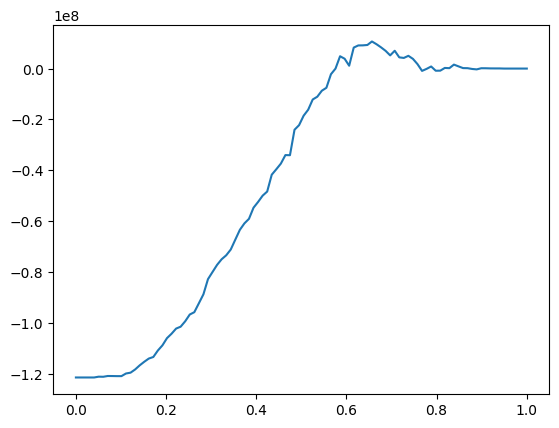

In [110]:
plt.plot(threshold_list, pnl_list)

In [111]:
px.line(x=threshold_list, y=pnl_list)

In [112]:
pnl_df = pd.DataFrame({"threshold": threshold_list, "pnl": pnl_list}).sort_values(
    by="pnl", ascending=False
)
pnl_df

,threshold,pnl
65,0.656566,1.064420e+07
66,0.666667,9.569506e+06
64,0.646465,9.268902e+06
63,0.636364,9.119181e+06
62,0.626263,9.090543e+06
...,...,...
3,0.030303,-1.213810e+08
2,0.020202,-1.213810e+08
1,0.010101,-1.213810e+08
4,0.040404,-1.213810e+08


In [113]:
pnl_df.sort_values(by="pnl", ascending=False).head(10)

,threshold,pnl
65,0.656566,10644204.24
66,0.666667,9569506.50
64,0.646465,9268901.82
63,0.636364,9119180.70
62,0.626263,9090542.52
67,0.676768,8333525.52
61,0.616162,8239201.56
70,0.707071,7000576.02
68,0.686869,6960166.56
69,0.696970,5181965.46


In [114]:
def analyse_pnl(taux=0.04, default_rate=1):
    threshold_list = np.linspace(0, 1, 100)
    pnl_list = []

    for threshold in threshold_list:
        v = 0
        for m, y_true, y_pred_proba in zip(
            montant_list, y_true_list, y_pred_proba_list
        ):
            v += calcul_pnl_one_complexe(
                m,
                y_true=y_true,
                y_pred_proba=y_pred_proba,
                threshold=threshold,
                default_rate=default_rate,
                taux=taux,
            )
        pnl_list.append(v)


fig = px.line(x=threshold_list, y=pnl_list)
fig.show()

In [115]:
analyse_pnl(taux=0.04, default_rate=1)

In [116]:
analyse_pnl(0.04, 0.25)

In [117]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.025, 0.25)

In [118]:
# pert que 25% de la somme
# taux interet = 0.03
analyse_pnl(0.03, 0.25)

In [119]:

y_pred_proba_list_df = pd.DataFrame(y_pred_proba_list, columns=['y_pred_test'])

In [120]:
print("Prédictions sur l'ensemble de test")
print(pd.DataFrame({
    "COUNT": y_pred_proba_list_df.value_counts(),
    "RATIO": y_pred_proba_list_df.value_counts() / len(y_pred_proba_list_df) * 100}))

Prédictions sur l'ensemble de test
             COUNT     RATIO
y_pred_test                 
0.620           84  1.365632
0.555           81  1.316859
0.600           80  1.300602
0.610           80  1.300602
0.660           79  1.284344
...            ...       ...
0.085            1  0.016258
0.080            1  0.016258
0.070            1  0.016258
0.065            1  0.016258
0.940            1  0.016258

[169 rows x 2 columns]


In [121]:
y_pred_rf_proba = grid_1.predict_proba(X_test)

y_pred_rf_proba

array([[0.77 , 0.23 ],
       [0.745, 0.255],
       [0.44 , 0.56 ],
       ...,
       [0.795, 0.205],
       [0.66 , 0.34 ],
       [0.415, 0.585]])

In [122]:
y_pred_rf_proba_df = pd.DataFrame(y_pred_rf_proba, columns=['proba_classe_0', 'proba_classe_1'])

In [123]:
y_pred_rf_proba_df[y_pred_rf_proba_df['proba_classe_1'] > 0.9].sort_values(by='proba_classe_1', ascending=False).round(2)

,proba_classe_0,proba_classe_1
4069,0.05,0.95
3097,0.06,0.94
4448,0.06,0.94
660,0.06,0.94
5169,0.07,0.93
1183,0.08,0.92
5257,0.08,0.92


In [124]:
x_train_after_preprocess_sample

,num__AGE,num__YEARS_EMPLOYED,num__TOTAL_CREDIT,num__REMB_MENSUEL,num__CNT_FAM_MEMBERS,num__MONTANT_PRIX_BIENS,num__REVENU_TOTAL,num__SOURCE_EXTERNE_2,num__FLAG_DOCUMENT_3,num__FLAG_DOCUMENT_6,...,num__TYPE_REVENUS_State servant,num__TYPE_REVENUS_Unemployed,num__TYPE_REVENUS_Working,num__GENRE_M,num__NIVEAU_EDUCATION_Higher education,num__NIVEAU_EDUCATION_Incomplete higher,num__NIVEAU_EDUCATION_Lower secondary,num__NIVEAU_EDUCATION_Secondary / secondary special,num__PROPRIETAIRE_VOITURE_Y,num__nbr_membre
7254,26.0,1.0,279000.0,8829.0,1.0,279000.0,121500.0,0.583357,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14382,30.0,7.0,180000.0,12028.5,3.0,180000.0,180000.0,0.508376,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
3116,57.0,-1000.0,454500.0,21865.5,2.0,454500.0,112500.0,0.724170,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
15254,33.0,7.0,247500.0,7222.5,2.0,247500.0,99000.0,0.412591,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2763,31.0,9.0,193500.0,10624.5,2.0,193500.0,112500.0,0.657464,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,41.0,6.0,2053845.0,71518.5,1.0,1773000.0,270000.0,0.644367,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
23468,27.0,1.0,135000.0,6750.0,1.0,135000.0,63000.0,0.621660,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23462,58.0,-1000.0,95940.0,9472.5,3.0,90000.0,81000.0,0.651768,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
4686,50.0,9.0,704844.0,29992.5,2.0,630000.0,211500.0,0.782216,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [125]:
shap_values.shape

(2460, 29, 2)

In [139]:
shap.initjs()

# Indice pour l'échantillon
idx = 852
# Afficher les informations sur le client
print("Client numero : ", df.iloc[idx, 0])
print("Model Prediction : Classe", y_pred_proba_list[idx])
print(f"Il y a {y_pred_rf_proba[idx][1]:.1%} de risques que le client ait des difficultés de paiement")
print("__"*40)

# Tracer le graphique SHAP pour la classe 1
shap.force_plot(explainer.expected_value[1], 
                shap_values[idx, :, 1],  # Accès aux valeurs SHAP pour la classe 1
                X_test.iloc[idx,:], 
                link='logit',
                figsize=(40, 8),
                ordering_keys=True,
                text_rotation=45,
                contribution_threshold=0.05)

Client numero :  32
Model Prediction : Classe 0.58
Il y a 42.0% de risques que le client ait des difficultés de paiement
________________________________________________________________________________


In [127]:
#import pickle

In [ ]:
1/0